<a href="https://colab.research.google.com/github/islammostafa99/Lab2_datamining/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Download the dataset and understand the format
2. Generate the Data Matrix and the Label vector

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2

samples=40
images_per_sample=10
data=[]
labels=[]

for i in range(1,samples+1):
  for j in range(1,images_per_sample+1):
    data.append(cv2.imread("/content/drive/MyDrive/orl_dataset/s"+str(i)+"/"+str(j)+".pgm",cv2.IMREAD_GRAYSCALE).reshape(10304))
    labels.append(i)

array=np.array(data)

In [3]:
print(array)
print(array.size)
print(labels)

[[ 48  49  45 ...  47  46  46]
 [ 60  60  62 ...  32  34  34]
 [ 39  44  53 ...  29  26  29]
 ...
 [125 119 124 ...  36  39  40]
 [119 120 120 ...  89  94  85]
 [125 124 124 ...  36  35  34]]
4121600
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 2

3. Split the Dataset into Training and Test sets

In [29]:
test_set = []
test_Label = []
train_set = []
train_Label = []

for i,j in zip(range (400),range(400)):
    if(i % 2 == 0):
        test_set.append(array[j])
        test_Label.append(labels[j])
    else:
        train_set.append(array[j])
        train_Label.append(labels[j])

test_set = np.asarray(test_set,dtype = "int32")
test_Label = np.asarray(test_Label,dtype = "int32")
train_set = np.asarray(train_set,dtype = "int32")
train_Label = np.asarray(train_Label,dtype = "int32")

4. Dimensionality Reduction using PCA and Classification using 1-NN
5. Hyper-parameter Tuning

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [40]:
def KNNClassifier(train_data,train_label,test_data,test_label):
    neighbours = [1,3,5,7]
    accuracy_matrix = []
    for i,neighbour in zip(range(len(neighbours)),neighbours):
        print("When Neighbour = " + "[" + str(neighbour) + "]")
        clf = KNeighborsClassifier(n_neighbors = neighbour, weights = 'distance') 
        clf.fit(train_data.T, train_label) 
        output = clf.predict(test_data.T)
        accuracy_matrix.append(accuracy_score(output,test_label)) 
        print("Accuracy score is: " + str(accuracy_matrix[i]))
        count = 0
        for i in range(len(output)):
            print("[" + str(i) + "]" + "Classified as: "+ str(output[i]) +" Actual is: "+ str(test_Label[i]))
            if((output[i]) != (test_Label[i])):
                print("Misclassified")
                count+=1
        print("Number of Misclassified is " + str(count))
        print("=========================================")
    plt.plot(accuracy_matrix,neighbours)
    plt.show()

In [32]:
Z_Matrix = train_set - np.mean(train_set,axis = 0)
Z_Matrix_Test = test_set - np.mean(test_set, axis = 0)

In [33]:
Cov_Matrix=np.dot(Z_Matrix.transpose(),Z_Matrix)/200

In [34]:
E_Values , E_Vectors = np.linalg.eigh(Cov_Matrix)

In [35]:
sort = E_Values.argsort()[::-1]
E_Values_Sorted = E_Values[sort]
E_Vectors_Sorted = E_Vectors[:,sort]

For alpha: 0.8
When Neighbour = [1]
Accuracy score is: 0.93
[0]Classified as: 16 Actual is: 1
Misclassified
[1]Classified as: 2 Actual is: 1
Misclassified
[2]Classified as: 1 Actual is: 1
[3]Classified as: 1 Actual is: 1
[4]Classified as: 1 Actual is: 1
[5]Classified as: 2 Actual is: 2
[6]Classified as: 2 Actual is: 2
[7]Classified as: 2 Actual is: 2
[8]Classified as: 2 Actual is: 2
[9]Classified as: 2 Actual is: 2
[10]Classified as: 3 Actual is: 3
[11]Classified as: 3 Actual is: 3
[12]Classified as: 3 Actual is: 3
[13]Classified as: 3 Actual is: 3
[14]Classified as: 3 Actual is: 3
[15]Classified as: 4 Actual is: 4
[16]Classified as: 4 Actual is: 4
[17]Classified as: 4 Actual is: 4
[18]Classified as: 4 Actual is: 4
[19]Classified as: 4 Actual is: 4
[20]Classified as: 5 Actual is: 5
[21]Classified as: 5 Actual is: 5
[22]Classified as: 5 Actual is: 5
[23]Classified as: 5 Actual is: 5
[24]Classified as: 5 Actual is: 5
[25]Classified as: 6 Actual is: 6
[26]Classified as: 6 Actual is: 6
[27

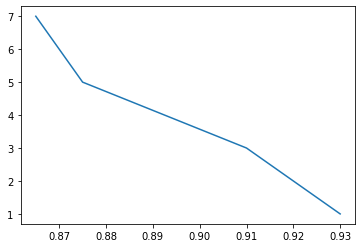

For alpha: 0.85
When Neighbour = [1]
Accuracy score is: 0.94
[0]Classified as: 16 Actual is: 1
Misclassified
[1]Classified as: 19 Actual is: 1
Misclassified
[2]Classified as: 1 Actual is: 1
[3]Classified as: 1 Actual is: 1
[4]Classified as: 1 Actual is: 1
[5]Classified as: 2 Actual is: 2
[6]Classified as: 2 Actual is: 2
[7]Classified as: 2 Actual is: 2
[8]Classified as: 2 Actual is: 2
[9]Classified as: 2 Actual is: 2
[10]Classified as: 3 Actual is: 3
[11]Classified as: 3 Actual is: 3
[12]Classified as: 3 Actual is: 3
[13]Classified as: 3 Actual is: 3
[14]Classified as: 3 Actual is: 3
[15]Classified as: 4 Actual is: 4
[16]Classified as: 4 Actual is: 4
[17]Classified as: 4 Actual is: 4
[18]Classified as: 4 Actual is: 4
[19]Classified as: 4 Actual is: 4
[20]Classified as: 5 Actual is: 5
[21]Classified as: 5 Actual is: 5
[22]Classified as: 5 Actual is: 5
[23]Classified as: 5 Actual is: 5
[24]Classified as: 5 Actual is: 5
[25]Classified as: 6 Actual is: 6
[26]Classified as: 6 Actual is: 6
[

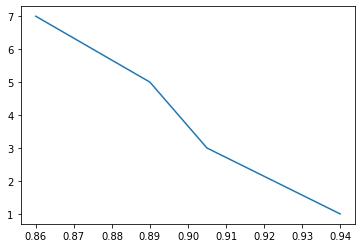

For alpha: 0.9
When Neighbour = [1]
Accuracy score is: 0.945
[0]Classified as: 16 Actual is: 1
Misclassified
[1]Classified as: 2 Actual is: 1
Misclassified
[2]Classified as: 1 Actual is: 1
[3]Classified as: 1 Actual is: 1
[4]Classified as: 1 Actual is: 1
[5]Classified as: 2 Actual is: 2
[6]Classified as: 2 Actual is: 2
[7]Classified as: 2 Actual is: 2
[8]Classified as: 2 Actual is: 2
[9]Classified as: 2 Actual is: 2
[10]Classified as: 3 Actual is: 3
[11]Classified as: 3 Actual is: 3
[12]Classified as: 3 Actual is: 3
[13]Classified as: 3 Actual is: 3
[14]Classified as: 3 Actual is: 3
[15]Classified as: 4 Actual is: 4
[16]Classified as: 4 Actual is: 4
[17]Classified as: 4 Actual is: 4
[18]Classified as: 4 Actual is: 4
[19]Classified as: 4 Actual is: 4
[20]Classified as: 5 Actual is: 5
[21]Classified as: 5 Actual is: 5
[22]Classified as: 5 Actual is: 5
[23]Classified as: 5 Actual is: 5
[24]Classified as: 5 Actual is: 5
[25]Classified as: 6 Actual is: 6
[26]Classified as: 6 Actual is: 6
[2

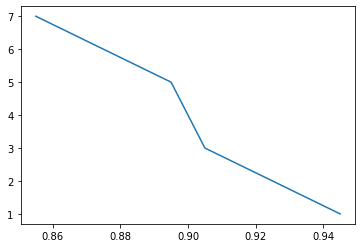

For alpha: 0.95
When Neighbour = [1]
Accuracy score is: 0.935
[0]Classified as: 16 Actual is: 1
Misclassified
[1]Classified as: 2 Actual is: 1
Misclassified
[2]Classified as: 1 Actual is: 1
[3]Classified as: 1 Actual is: 1
[4]Classified as: 1 Actual is: 1
[5]Classified as: 2 Actual is: 2
[6]Classified as: 2 Actual is: 2
[7]Classified as: 2 Actual is: 2
[8]Classified as: 2 Actual is: 2
[9]Classified as: 2 Actual is: 2
[10]Classified as: 3 Actual is: 3
[11]Classified as: 3 Actual is: 3
[12]Classified as: 3 Actual is: 3
[13]Classified as: 3 Actual is: 3
[14]Classified as: 3 Actual is: 3
[15]Classified as: 4 Actual is: 4
[16]Classified as: 4 Actual is: 4
[17]Classified as: 4 Actual is: 4
[18]Classified as: 4 Actual is: 4
[19]Classified as: 4 Actual is: 4
[20]Classified as: 5 Actual is: 5
[21]Classified as: 5 Actual is: 5
[22]Classified as: 5 Actual is: 5
[23]Classified as: 5 Actual is: 5
[24]Classified as: 5 Actual is: 5
[25]Classified as: 6 Actual is: 6
[26]Classified as: 6 Actual is: 6
[

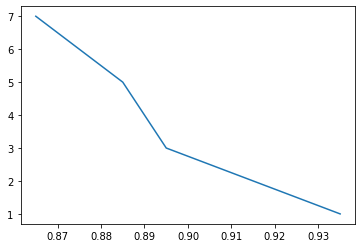

In [55]:
alphas = [0.8,0.85,0.9,0.95]
for alpha in alphas:
    sum=0
    counter=0
    for i in E_Values_Sorted:
      sum=sum+i
      if(sum/E_Values_Sorted.sum() >= alpha):
          break
      counter = counter+1
    #print(counter)
    New_Matrix = E_Vectors_Sorted[: , 0 : counter + 1]
    U_Train = np.dot(New_Matrix.T , train_set.T)
    U_Test = np.dot(New_Matrix.T , test_set.T)
    print("For alpha: " + str(alpha))
    KNNClassifier(U_Train,train_Label,U_Test,test_Label)